In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import analysis as an
from pathlib import Path

project_folder = Path(an.__file__).parent.parent.resolve()

# plt.style.use('seaborn')
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')
sns.set_color_codes('deep')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Connectivity Analysis

## Data loading

In [2]:
data_folder = project_folder / 'data'
results_folder = project_folder / 'results'
results_folder.mkdir(exist_ok=True)
print(f'Storing results in: {results_folder}')
print('Available data paths:')
[x for x in sorted(data_folder.iterdir()) if x.is_dir()]


Storing results in: /home/chwalisz/Code/twist/experiments/walker/results
Available data paths:


[PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2018-01-17-144113'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2018-01-17-192523'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/outdated')]

In [3]:
df_list = [
    an.get_iperf_folder(data_folder / '2018-01-17-144113', recursive=True),
    an.get_iperf_folder(data_folder / '2018-01-17-192523', recursive=True),
]
df = pd.concat(df_list)

df.head()

,Throughput [Mbps],bytes,end,omitted,packets,seconds,socket,start,Client,Access Point,Kernel,Timestamp,System Info,Protocol,Connection,file
0,22673100.0,2834432,1.00011,False,346,1.000110,4,0.00000,nuc6,nuc4,4.14.5-041405-generic,"Wed, 17 Jan 2018 14:01:42 GMT",Linux nuc6 4.14.5-041405-generic #201712101332...,UDP,nuc4\nnuc6,nuc4-nuc6
1,26671700.0,3334144,2.00016,False,407,1.000050,4,1.00011,nuc6,nuc4,4.14.5-041405-generic,"Wed, 17 Jan 2018 14:01:42 GMT",Linux nuc6 4.14.5-041405-generic #201712101332...,UDP,nuc4\nnuc6,nuc4-nuc6
2,27394300.0,3424256,3.00015,False,418,0.999989,4,2.00016,nuc6,nuc4,4.14.5-041405-generic,"Wed, 17 Jan 2018 14:01:42 GMT",Linux nuc6 4.14.5-041405-generic #201712101332...,UDP,nuc4\nnuc6,nuc4-nuc6
3,28180500.0,3522560,4.00015,False,430,1.000000,4,3.00015,nuc6,nuc4,4.14.5-041405-generic,"Wed, 17 Jan 2018 14:01:42 GMT",Linux nuc6 4.14.5-041405-generic #201712101332...,UDP,nuc4\nnuc6,nuc4-nuc6
4,28377000.0,3547136,5.00015,False,433,1.000000,4,4.00015,nuc6,nuc4,4.14.5-041405-generic,"Wed, 17 Jan 2018 14:01:42 GMT",Linux nuc6 4.14.5-041405-generic #201712101332...,UDP,nuc4\nnuc6,nuc4-nuc6


## Throughput analysis

In [4]:
throughput = df.groupby(['Access Point', 'Client', 'Kernel'])['Throughput [Mbps]'].describe()
throughput

count          mean           std  \
Access Point Client Kernel                                                      
nuc10        nuc12  3.18.87-031887-generic  600.0  1.982681e+06  1.107750e+06   
                    4.14.5-041405-generic   600.0  2.531438e+06  1.204261e+06   
             nuc13  3.18.87-031887-generic  600.0  5.511620e+07  1.023968e+06   
                    4.14.5-041405-generic   600.0  5.507240e+07  1.530037e+06   
             nuc4   3.18.87-031887-generic  600.0  2.065760e+07  1.105270e+06   
                    4.14.5-041405-generic   600.0  2.901202e+07  5.950485e+06   
             nuc6   3.18.87-031887-generic  600.0  4.771828e+07  1.001825e+06   
                    4.14.5-041405-generic   600.0  8.020296e+07  1.683148e+06   
nuc11        nuc13  3.18.87-031887-generic  600.0  8.500891e+06  4.330391e+05   
                    4.14.5-041405-generic   600.0  9.240247e+06  4.518421e+06   
             nuc4   3.18.87-031887-generic  600.0  1.873739e+07  6.947005e+05   
                    4.14.5-041405-generic   600.0  2.109330e+07  3.064439e+06   
nuc12        nuc10  3.18.87-031887-generic  600.0  3.695138e+06  3.183239e+05   
             nuc4   3.18.87-031887-generic  600.0  3.696525e+07  1.087711e+06   
                    4.14.5-041405-generic   600.0  3.711183e+07  2.728012e+06   
             nuc6   3.18.87-031887-generic  600.0  1.572306e+07  9.192109e+05   
                    4.14.5-041405-generic   600.0  1.898730e+07  2.895118e+06   
nuc13        nuc10  4.14.5-041405-generic   600.0  5.575996e+07  1.158453e+06   
             nuc11  4.14.5-041405-generic   600.0  7.166688e+06  8.440859e+05   
             nuc4   3.18.87-031887-generic  600.0  1.695798e+07  5.590556e+05   
                    4.14.5-041405-generic   600.0  1.393983e+07  1.244893e+06   
             nuc6   4.14.5-041405-generic   600.0  3.825696e+07  8.938981e+05   
nuc4         nuc10  3.18.87-031887-generic  600.0  1.994752e+07  1.632116e+06   
                    4.14.5-041405-generic   600.0  2.860831e+07  9.132692e+05   
             nuc11  3.18.87-031887-generic  600.0  1.454954e+07  3.596013e+05   
                    4.14.5-041405-generic   600.0  1.744841e+07  1.755698e+06   
             nuc12  3.18.87-031887-generic  600.0  3.282807e+07  1.482703e+06   
                    4.14.5-041405-generic   600.0  2.815765e+07  1.071149e+06   
             nuc13  3.18.87-031887-generic  600.0  9.420252e+06  3.392312e+05   
                    4.14.5-041405-generic   600.0  1.421497e+07  1.102339e+06   
             nuc6   3.18.87-031887-generic  600.0  2.832870e+07  1.073818e+06   
                    4.14.5-041405-generic   600.0  2.761621e+07  8.714244e+05   
nuc6         nuc10  3.18.87-031887-generic  600.0  5.555932e+07  9.214495e+05   
                    4.14.5-041405-generic   600.0  5.590821e+07  1.311118e+06   
             nuc12  3.18.87-031887-generic  600.0  1.142139e+07  9.682329e+05   
                    4.14.5-041405-generic   600.0  1.520533e+07  7.952546e+05   
             nuc13  3.18.87-031887-generic  600.0  3.836400e+07  6.788698e+05   
                    4.14.5-041405-generic   600.0  3.801797e+07  1.072993e+06   
             nuc4   3.18.87-031887-generic  600.0  3.865563e+07  7.449842e+05   
                    4.14.5-041405-generic   600.0  4.564352e+07  8.018753e+06   

                                                   min         25%  \
Access Point Client Kernel                                           
nuc10        nuc12  3.18.87-031887-generic    262140.0    851926.5   
                    4.14.5-041405-generic     196587.0   1441850.0   
             nuc13  3.18.87-031887-generic  44164800.0  54639625.0   
                    4.14.5-041405-generic   34137000.0  54525700.0   
             nuc4   3.18.87-031887-generic  17891400.0  19791900.0   
                    4.14.5-041405-generic   14221200.0  25540875.0   
             nuc6   3.18.87-031887-generic  39446700.0  47253800.0   
           

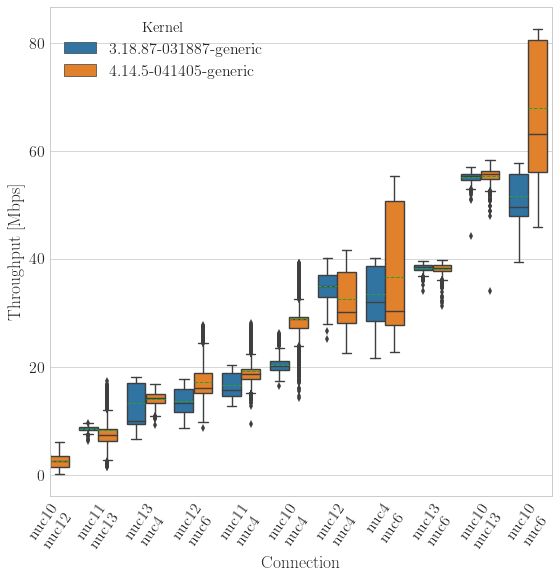

In [5]:
fig, ax = plt.subplots(figsize=(9,9))

sns.boxplot(
    x='Connection',
    y='Throughput [Mbps]',
    hue='Kernel',
    data=df,
    showfliers=True,
    showmeans=True,
    meanline=True,
    order=list(df.groupby('Connection')['Throughput [Mbps]'].describe().sort_values('mean').index),
    hue_order=sorted(df['Kernel'].unique()),
#     split=True,
#     cut=0,
);
ax.set_xlim([0, None])
ax.yaxis.set_major_formatter(an.bitrate_formatter)
plt.xticks(rotation=55)
fig.savefig(str(results_folder / 'throughput_kernels.pdf'), transparent=False, bbox_inches='tight')

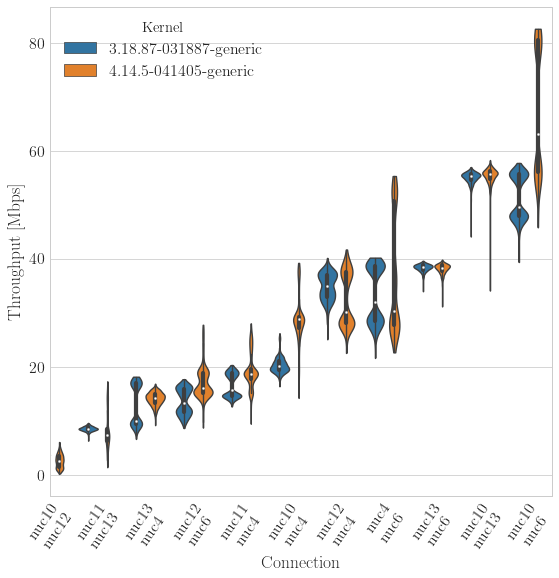

In [6]:
fig, ax = plt.subplots(figsize=(9,9))

sns.violinplot(
    y='Throughput [Mbps]',
    x='Connection',
    hue='Kernel',
    data=df,
    showfliers=False,
#     split=True,
    cut=0,
    order=list(df.groupby('Connection')['Throughput [Mbps]'].describe().sort_values('mean').index),
    hue_order=sorted(df['Kernel'].unique()),
);
ax.set_xlim([0, None])
plt.xticks(rotation=55)
ax.yaxis.set_major_formatter(an.bitrate_formatter)
# ax.xaxis.set_major_formatter(an.bitrate_formatter)

## Kernel comarison

Looking at mean throughput

In [7]:
kernels = pd.pivot_table(
    throughput,
    values='mean',
    index=['Access Point', 'Client'],
    columns='Kernel',
#     aggfunc=np.mean,
)
kernel_comparison = kernels['4.14.5-041405-generic'] / kernels['3.18.87-031887-generic']
kernels

Kernel               3.18.87-031887-generic  4.14.5-041405-generic
Access Point Client                                               
nuc10        nuc12             1.982681e+06           2.531438e+06
             nuc13             5.511620e+07           5.507240e+07
             nuc4              2.065760e+07           2.901202e+07
             nuc6              4.771828e+07           8.020296e+07
nuc11        nuc13             8.500891e+06           9.240247e+06
             nuc4              1.873739e+07           2.109330e+07
nuc12        nuc10             3.695138e+06                    NaN
             nuc4              3.696525e+07           3.711183e+07
             nuc6              1.572306e+07           1.898730e+07
nuc13        nuc10                      NaN           5.575996e+07
             nuc11                      NaN           7.166688e+06
             nuc4              1.695798e+07           1.393983e+07
             nuc6                       NaN           3.825696e+07
nuc4         nuc10             1.994752e+07           2.860831e+07
             nuc11             1.454954e+07           1.744841e+07
             nuc12             3.282807e+07           2.815765e+07
             nuc13             9.420252e+06           1.421497e+07
             nuc6              2.832870e+07           2.761621e+07
nuc6         nuc10             5.555932e+07           5.590821e+07
             nuc12             1.142139e+07           1.520533e+07
             nuc13             3.836400e+07           3.801797e+07
             nuc4              3.865563e+07           4.564352e+07

count    18.000000
mean      1.171766
std       0.232810
min       0.822022
25%       1.000395
50%       1.153253
75%       1.317671
max       1.680760
dtype: float64

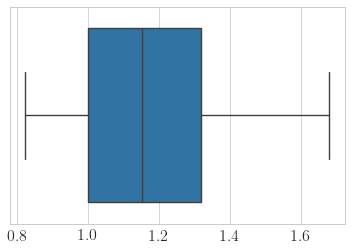

In [8]:
sns.boxplot(kernel_comparison)
kernel_comparison.describe()

Looking and standard deviations

In [9]:
kernel_std = pd.pivot_table(
    throughput,
    values='std',
    index=['Access Point', 'Client'],
    columns='Kernel',
#     aggfunc=np.mean,
)
kernel_std_comp = kernel_std['4.14.5-041405-generic'] / kernel_std['3.18.87-031887-generic']
kernel_std_comp

Access Point  Client
nuc10         nuc12      1.087123
              nuc13      1.494223
              nuc4       5.383737
              nuc6       1.680081
nuc11         nuc13     10.434210
              nuc4       4.411166
nuc12         nuc10           NaN
              nuc4       2.508030
              nuc6       3.149568
nuc13         nuc10           NaN
              nuc11           NaN
              nuc4       2.226779
              nuc6            NaN
nuc4          nuc10      0.559561
              nuc11      4.882347
              nuc12      0.722430
              nuc13      3.249520
              nuc6       0.811520
nuc6          nuc10      1.422887
              nuc12      0.821346
              nuc13      1.580558
              nuc4      10.763654
dtype: float64

count    18.000000
mean      3.177152
std       3.067554
min       0.559561
25%       1.171064
50%       1.953430
75%       4.120755
max      10.763654
dtype: float64

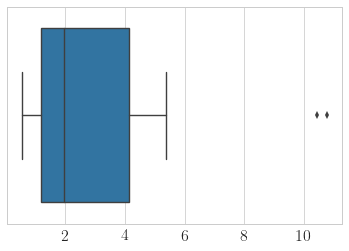

In [10]:
sns.boxplot(kernel_std_comp)
kernel_std_comp.describe()

## Connection investigation

In [11]:
connections = pd.pivot_table(
    df[df['Kernel'] == '4.14.5-041405-generic'],
    values='Throughput [Mbps]',
    index='Access Point',
    columns='Client',
    aggfunc=np.mean,
)
connections = connections * 1e-6
connections

Client,nuc10,nuc11,nuc12,nuc13,nuc4,nuc6
Access Point,,,,,,
nuc10,NaN,NaN,2.531438,55.072405,29.012020,80.202956
nuc11,NaN,NaN,NaN,9.240247,21.093300,NaN
nuc12,NaN,NaN,NaN,NaN,37.111828,18.987303
nuc13,55.759964,7.166688,NaN,NaN,13.939831,38.256959
nuc4,28.608314,17.448412,28.157646,14.214971,NaN,27.616207
nuc6,55.908207,NaN,15.205329,38.017973,45.643524,NaN


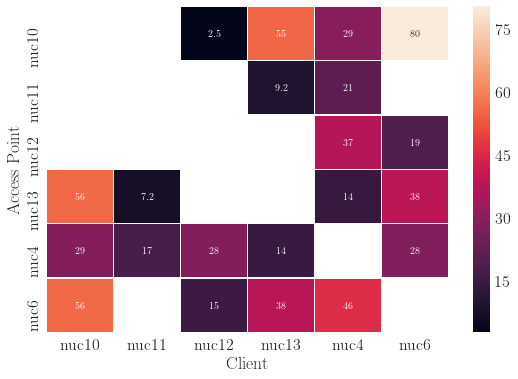

In [12]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(connections, annot=True, linewidths=.5, ax=ax)